# Sales Analysis Using Online Electronic Store Data
# Aakanksha Baid
----------------------------------------------------------------------------

In [0]:
print('Hello')
varname = 1
varname
varname = "Hello"
varname

Hello


'Hello'

In [0]:
import os
import pandas as pd

## 1) Import the data

In [0]:
files = [file for file in os.listdir('/content/Sales_Data') if not file.startswith('.')]
files

['Sales_October_2019.csv',
 'Sales_August_2019.csv',
 'Sales_March_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv',
 'Sales_November_2019.csv',
 'Sales_June_2019.csv',
 'Sales_December_2019.csv',
 'Sales_May_2019.csv',
 'Sales_July_2019.csv',
 'Sales_September_2019.csv']

In [0]:
data = pd.DataFrame()

for file in files: # concatenating files
  temp = pd.read_csv('/content/Sales_Data/'+ file)
  data = pd.concat([data,temp])

## 2) Clean the Data
##### a) Drop NaN values from the data

In [0]:
data[data.isna().any(axis=1)] # finding NA values in data for each column

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.shape

(186850, 6)

In [0]:
data = data.dropna(how = 'all')
data[data.isna().any(axis=1)] # checking if all NA values got dropped

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [0]:
data.shape

(186305, 6)

##### b) Clean tuples with column names as their entry

In [0]:
data[data['Order Date'] == 'Order Date'] # come here after step 3.1 error

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
521,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
833,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2180,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2388,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4248,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [0]:
data = data[data['Order Date'] != 'Order Date']

In [0]:
data.shape

(185950, 6)

##### c) Convert the columns to the correct data type

In [0]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered']) # come here after 4a
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

## 3) Augmentation of the data 
##### a) Add a month column with the numeric value of the month

In [0]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [0]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10


In [0]:
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

##### b) Add a city column with state notation

In [0]:
def getCity(address):
  return address.split(',')[1]

def getState(address):
  return address.split(',')[2].split(' ')[1]

data['City'] = data['Purchase Address'].apply(lambda x: getCity(x) + ' (' + getState(x) + ')')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,Dallas (TX)
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,Los Angeles (CA)
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,New York City (NY)
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,New York City (NY)
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA)
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA)
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA)
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA)


##### c) Add hours column

In [0]:
data['Hour'] = data['Order Date'].dt.hour

## 4) Explore the data!!
#### Qa) Find out the best month for sales and the total amount earned that month.

In [0]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
City                        object
Hour                         int64
Sales                      float64
dtype: object

In [0]:
resultsa = data.groupby('Month')['Sales'].sum()
resultsa

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

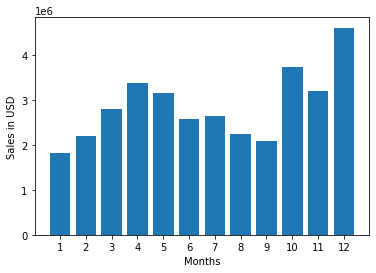

In [0]:
import matplotlib.pyplot as plt

months = data['Month'].unique()
months.sort()

plt.bar(months,resultsa)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

##### Qb) Find out the city which sold the most number of products.

In [0]:
resultb = data.groupby('City')['Quantity Ordered'].sum()
resultb

City
 Atlanta (GA)          16602
 Austin (TX)           11153
 Boston (MA)           22528
 Dallas (TX)           16730
 Los Angeles (CA)      33289
 New York City (NY)    27932
 Portland (ME)          2750
 Portland (OR)         11303
 San Francisco (CA)    50239
 Seattle (WA)          16553
Name: Quantity Ordered, dtype: int64

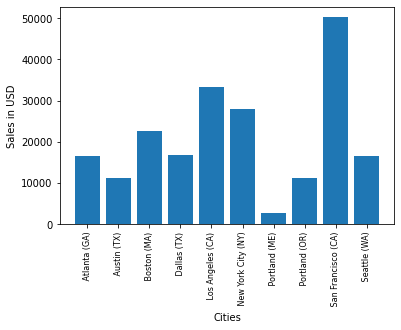

In [0]:
cities = data['City'].unique()
cities.sort()

plt.bar(cities,resultb)
plt.xticks(cities, rotation='vertical', size = 8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

##### Qc) Find out the best time to display advertisements for maximum customer engagement.

In [0]:
resultc = data.groupby('Hour').count()
resultc

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


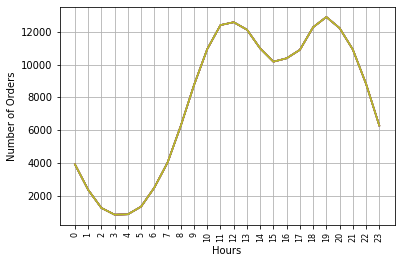

In [0]:
hours = data['Hour'].unique()
hours.sort()

plt.plot(hours,resultc)
plt.xticks(hours, rotation='vertical', size = 8)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

##### Qd) Find the pair of products that are often sold together.

In [0]:
resultd = data[data['Order ID'].duplicated(keep=False)]
resultd['Grouped'] = resultd.groupby('Order ID')['Product'].transform(lambda x: (', ').join(x))
resultd = resultd[['Order ID', 'Grouped']].drop_duplicates()
resultd

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
62,259420,"Google Phone, USB-C Charging Cable"
65,259422,"Google Phone, USB-C Charging Cable"
82,259438,"iPhone, Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor, ThinkPad Laptop"
123,259477,"LG Dryer, AAA Batteries (4-pack)"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [0]:
from itertools import combinations
from collections import Counter

In [0]:
count = Counter()

for products in resultd['Grouped']:
  product_list = products.split(', ')
  count.update(Counter(combinations(product_list, 2))) # 2 filters out data which only has 2 products as we have to look for pairs

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]